In [1]:
from defillama2 import DefiLlama
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter, FuncFormatter

pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 50)
pd.options.display.float_format = '{:,.4f}'.format

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.style.use("fivethirtyeight")

# Makes graphs crisp. Only use if you don't have a lot of points/lines on your graph.
%config InlineBackend.figure_formats = ['svg', 'retina'] # use svg, then retina if svg is not supported

In [2]:
def human_format_dollar_or_num(dollar=False, decimals=0):
    """ 
    Return a function for formatting matplot axis numbers human friendly. 

    Parameters
    ----------
    dollar: logical
        If True, will add $ in front of the numbers.
    decimals: int
        Number of decimals to display.
    """

    base_fmt = '%.{}f%s'.format(decimals)
    if dollar:
        base_fmt = '$' + base_fmt

    def human_format(num, pos): # pos is necessary as it'll be used by matplotlib
        magnitude = 0
        while abs(num) >= 1000:
            magnitude += 1
            num /= 1000.0
        return base_fmt % (num, ['', 'K', 'M', 'B', 'T', 'P'][magnitude])
    return human_format

## Create a DefiLlama instance

In [3]:
obj = DefiLlama()

## Get historical DeFi TVL on all chains

In [4]:
df = obj.get_defi_hist_tvl()
df.tail()

,tvl
date,
2022-10-01,"74,996,358,501.1898"
2022-10-02,"75,209,945,493.9769"
2022-10-03,"74,330,562,940.6809"
2022-10-04,"75,419,074,074.6764"
2022-10-05,"76,261,676,121.7877"


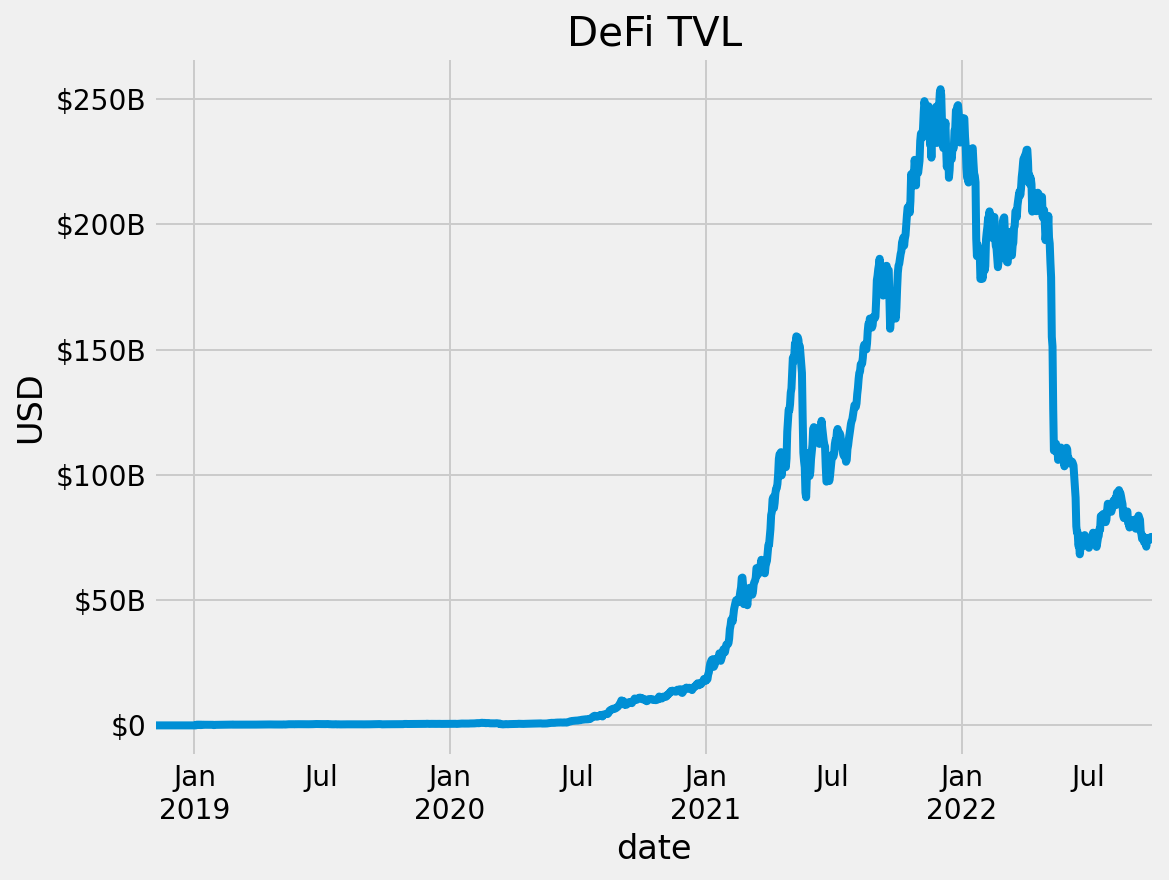

In [5]:
ax = df.tvl.plot()
dollar_formatter = FuncFormatter(human_format_dollar_or_num(dollar=True, decimals=0))
ax.yaxis.set_major_formatter(dollar_formatter)
plt.ylabel("USD")
plt.title("DeFi TVL");

## Get historical TVL of a chain

In [6]:
df = obj.get_chain_hist_tvl('Arbitrum')
df.tail()

,tvl
date,
2022-10-01,"1,008,458,047.3219"
2022-10-02,"1,003,732,414.5372"
2022-10-03,"993,776,479.1881"
2022-10-04,"1,007,605,594.4811"
2022-10-05,"1,025,244,500.7873"


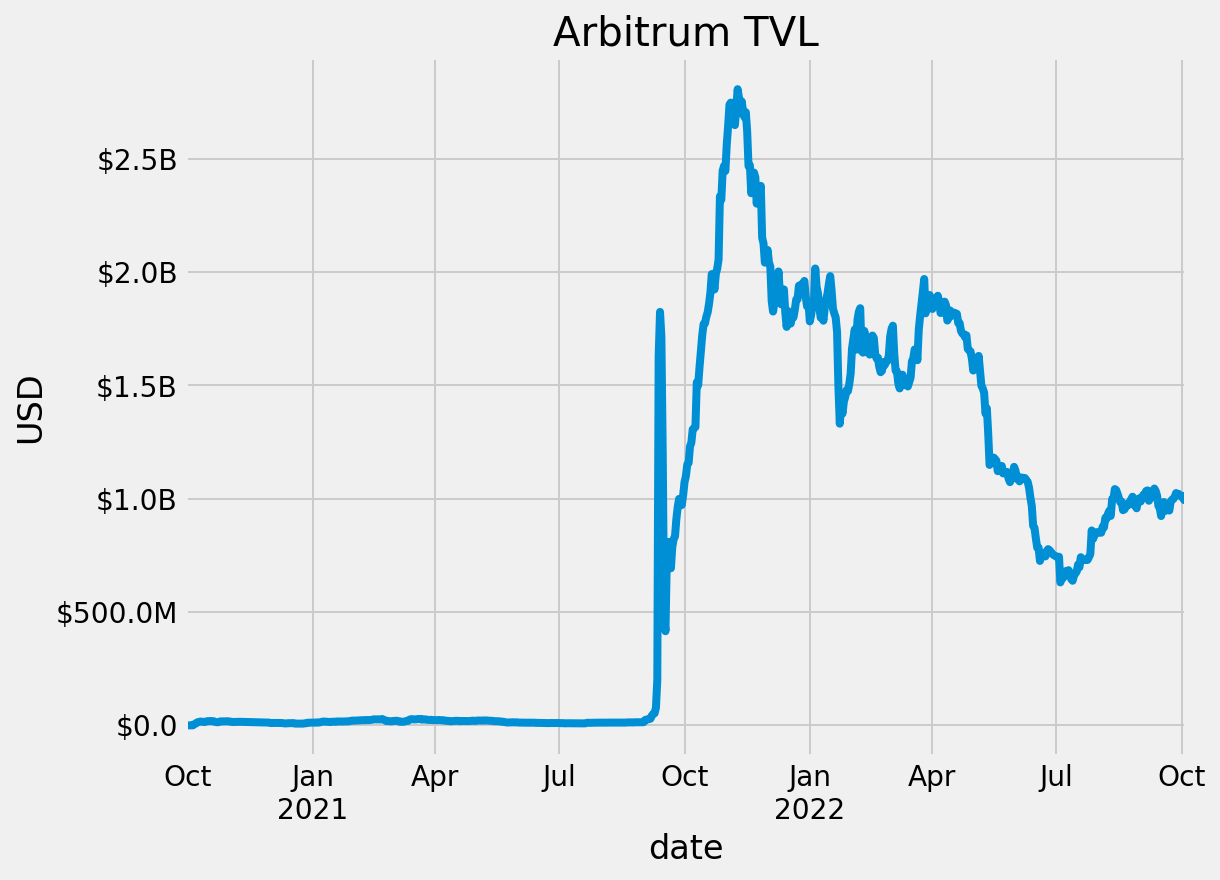

In [7]:
ax = df.tvl.plot()
dollar_formatter = FuncFormatter(human_format_dollar_or_num(dollar=True, decimals=1))
ax.yaxis.set_major_formatter(dollar_formatter)
plt.ylabel("USD")
plt.title("Arbitrum TVL");

## Get current TVL of all chains

In [8]:
df = obj.get_chains_curr_tvl()

# print top 20 chains by tvl
df = df.sort_values('tvl', ascending=False) 
df.head(20)

,token,tvl
chain,,
Ethereum,ETH,"49,148,804,786.0100"
Binance,BNB,"6,683,623,881.6306"
Tron,TRON,"5,706,008,808.3292"
Solana,SOL,"2,074,564,968.5811"
Avalanche,AVAX,"1,925,810,092.9080"
Polygon,MATIC,"1,502,984,043.1499"
Optimism,OP,"1,052,702,449.6556"
Arbitrum,None,"1,025,244,500.7873"
Cronos,CRO,"776,108,182.5314"


## Get current TVL of a protocol

In [9]:
obj.get_protocol_curr_tvl('gmx')

457957096.51924086

In [10]:
obj.get_protocol_curr_tvl('premia')

7767712.684000522

In [11]:
obj.get_protocol_curr_tvl('gns')

{'message': 'Protocol is not in our database'}

In [12]:
# but it doesn't always work, for example, can't pull AAVE
obj.get_protocol_curr_tvl('aave')

{'message': 'Protocol is not in our database'}

## Get current TVL of a protocol broken down by chain

In [13]:
df = obj.get_protocol_curr_tvl_by_chain('gmx')
df

,tvl
Avalanche,"66,155,217.4981"
Avalanche-staking,"15,654,060.2322"
Arbitrum-staking,"268,689,534.9905"
Arbitrum,"391,801,879.0212"


In [14]:
# the current TVL can be obtained by summing the non-staking values
abs(df[~df.index.str.contains('staking')].sum() - obj.get_protocol_curr_tvl('gmx')) < 0.1

tvl    True
dtype: bool

In [15]:
df = obj.get_protocol_curr_tvl_by_chain('premia')
df

,tvl
Optimism,"1,278,059.4553"
Binance,"9,591.7600"
Ethereum,"1,935,217.6174"
Ethereum-staking,"5,025,979.4908"
Arbitrum,"3,356,017.0621"
Fantom,"1,188,826.7891"


In [16]:
# the current TVL can be obtained by summing the non-staking values
abs(df[~df.index.str.contains('staking')].sum() - obj.get_protocol_curr_tvl('premia')) < 0.1

tvl    True
dtype: bool

In [17]:
# let's get AAVE's current TVL
df = obj.get_protocol_curr_tvl_by_chain('aave')
df[~df.index.str.contains('staking')].sum()

tvl   12,152,662,858.1020
dtype: float64

## Get historical TVL of a protocol by chain

In [18]:
dd = obj.get_protocol_hist_tvl_by_chain('gmx')

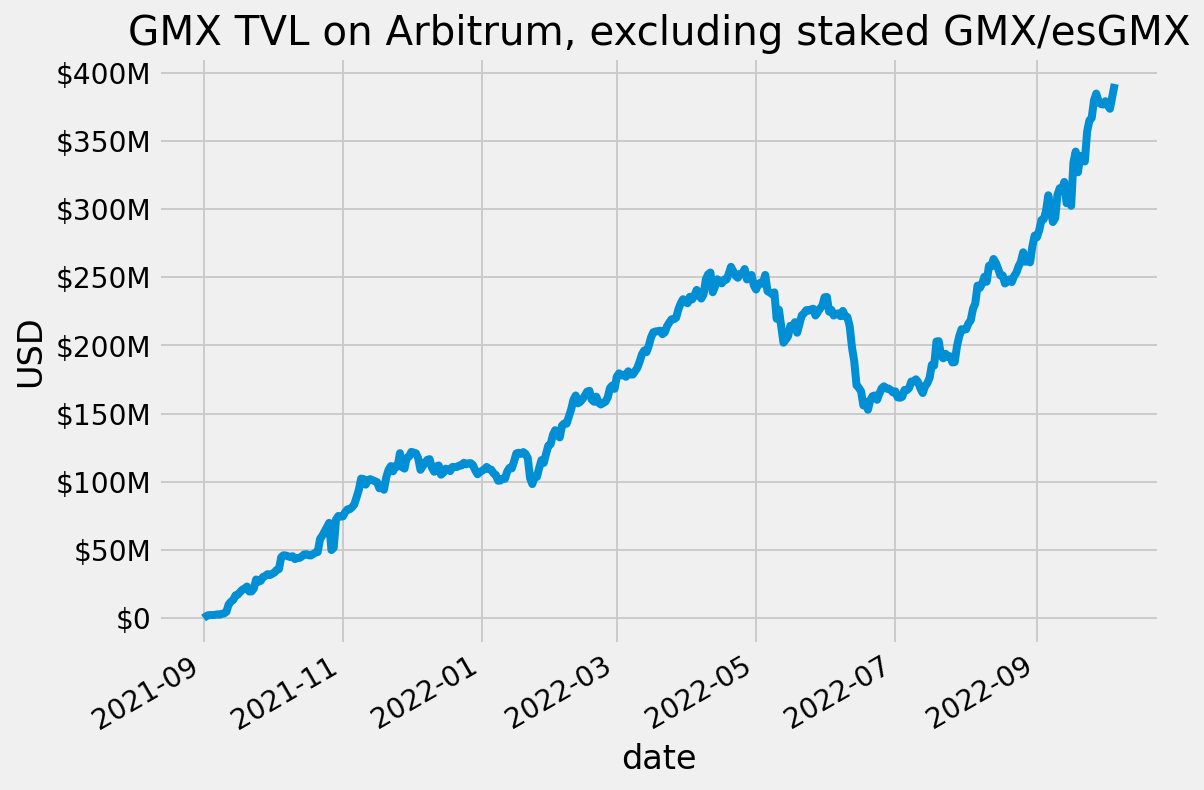

In [19]:
ax = dd['Arbitrum'].tvl.plot()
dollar_formatter = FuncFormatter(human_format_dollar_or_num(dollar=True, decimals=0))
ax.yaxis.set_major_formatter(dollar_formatter)
plt.ylabel("USD")
plt.title("GMX TVL on Arbitrum, excluding staked GMX/esGMX");

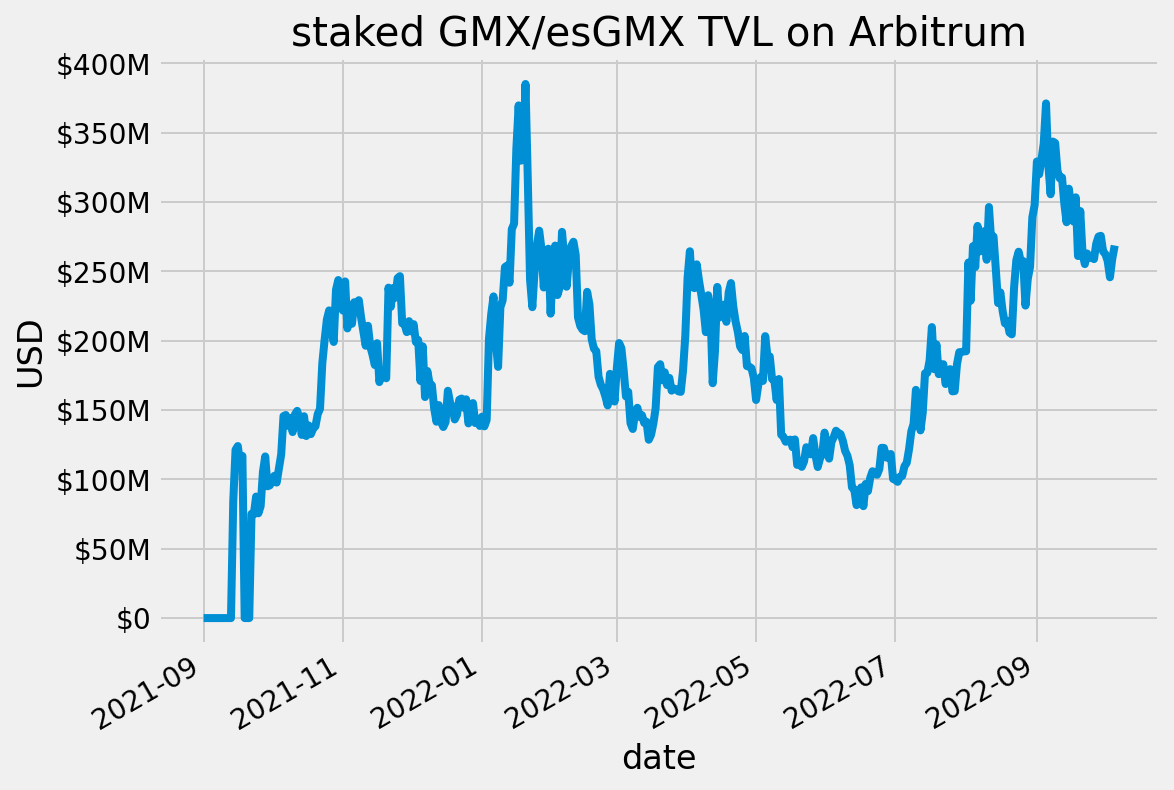

In [20]:
ax = dd['Arbitrum-staking'].tvl.plot()
ax.yaxis.set_major_formatter(dollar_formatter)
plt.ylabel("USD")
plt.title("staked GMX/esGMX TVL on Arbitrum");

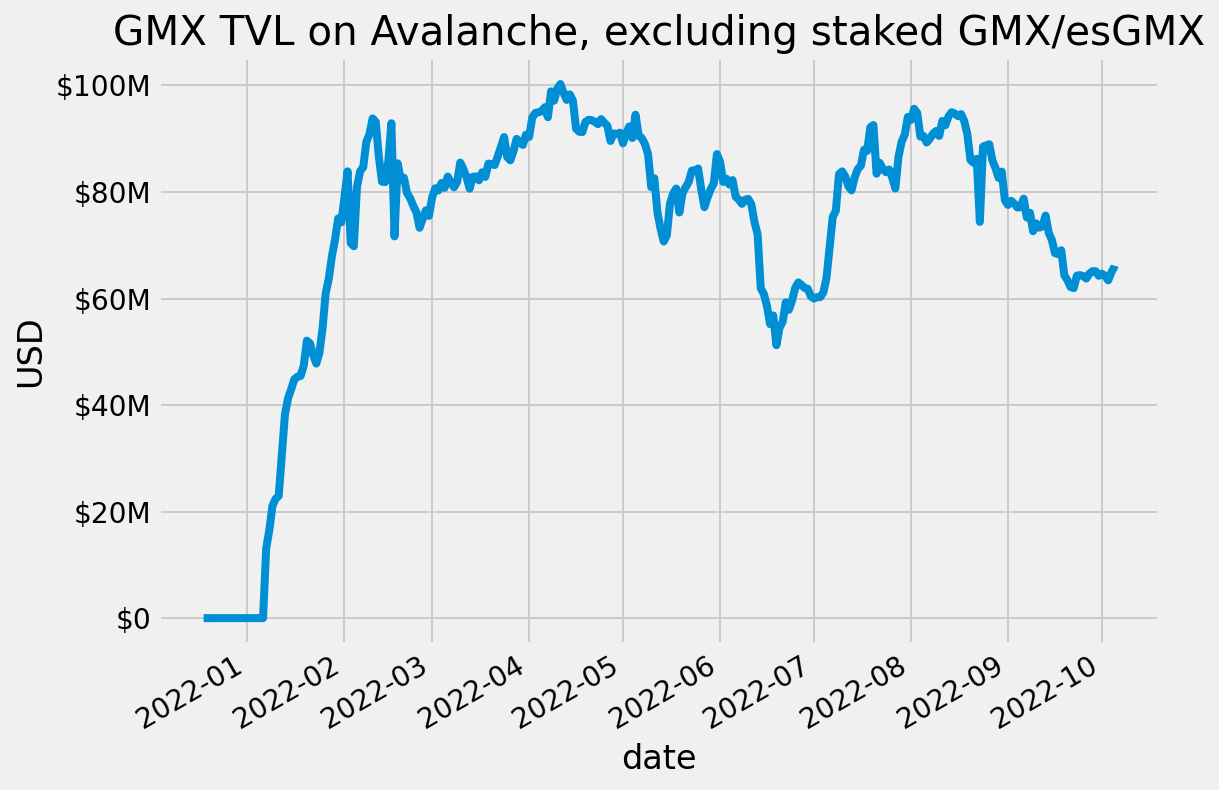

In [21]:
ax = dd['Avalanche'].tvl.plot()
ax.yaxis.set_major_formatter(dollar_formatter)
plt.ylabel("USD")
plt.title("GMX TVL on Avalanche, excluding staked GMX/esGMX");

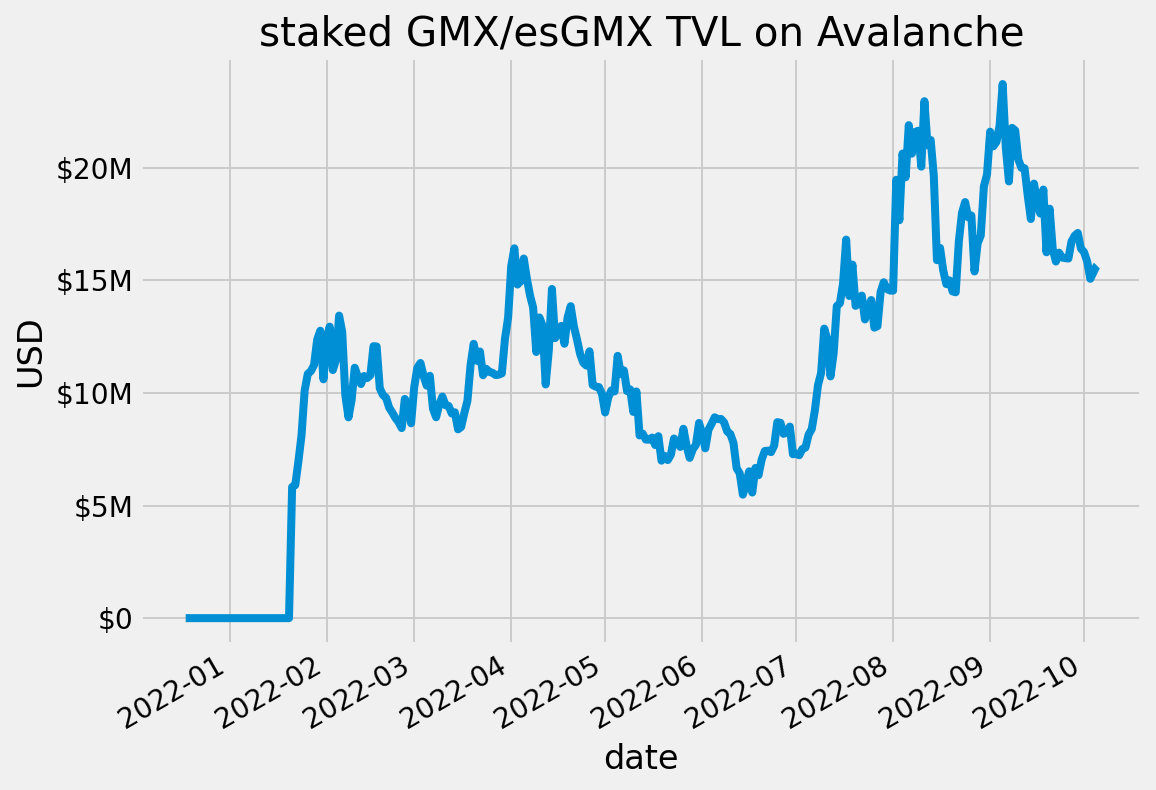

In [22]:
ax = dd['Avalanche-staking'].tvl.plot()
ax.yaxis.set_major_formatter(dollar_formatter)
plt.ylabel("USD")
plt.title("staked GMX/esGMX TVL on Avalanche");

## Get fundamentals for all protocols

In [23]:
df = obj.get_protocols_fundamentals()
df = df.sort_values('tvl', ascending=False, ignore_index=True)
df.head(10)

,name,symbol,chain,category,chains,tvl,change_1d,change_7d,fdv,mcap,forked_from
0,MakerDAO,MKR,Ethereum,CDP,[Ethereum],"7,747,997,603.5237",1.6374,8.6097,"843,756,803.0000","756,269,528.0000",NaN
1,Polygon Bridge & Staking,MATIC,Polygon,Chain,[Polygon],"6,775,624,221.7561",2.2910,10.1905,"8,389,155,101.0000","6,242,789,036.0000",NaN
2,Lido,LDO,Multi-Chain,Liquid Staking,"[Ethereum, Solana, Moonbeam, Moonriver, Terra]","6,169,383,418.3217",2.5883,7.4495,"1,560,589,648.0000","1,023,146,863.0000",NaN
3,Curve,CRV,Multi-Chain,Dexes,"[Ethereum, Polygon, xDai, Arbitrum, Avalanche,...","6,039,597,149.9083",-0.3335,3.0544,"3,003,242,917.0000","356,383,466.0000",NaN
4,Uniswap,UNI,Multi-Chain,Dexes,"[Ethereum, Arbitrum, Polygon, Optimism, Celo]","5,284,686,846.3564",NaN,3.0722,"6,634,544,209.0000","5,000,898,275.0000",NaN
5,WBTC,WBTC,Ethereum,Bridge,[Ethereum],"4,943,348,471.7864",3.3195,8.9492,"4,874,422,742.0000","4,874,422,742.0000",NaN
6,AAVE V2,AAVE,Multi-Chain,Lending,"[Ethereum, Polygon, Avalanche]","4,313,280,546.5203",2.2399,2.3939,"1,217,810,096.0000","1,074,339,812.0000",NaN
7,Convex Finance,CVX,Ethereum,Yield,[Ethereum],"3,992,770,495.5652",-1.0436,1.6546,"491,372,807.0000","340,433,212.0000",NaN
8,JustLend,JST,Tron,Lending,[Tron],"3,437,730,373.8881",-3.2598,10.4196,"251,995,819.0000","226,594,641.0000",NaN
9,PancakeSwap,CAKE,Binance,Dexes,[Binance],"2,991,155,503.5250",1.4903,5.4332,"3,516,949,827.0000","654,339,332.0000",[Uniswap]


In [24]:
# find the 5 protocols with the biggest % jump in TVL in last 7 days
df.sort_values('change_7d', ascending=False, ignore_index=True).head(5)

,name,symbol,chain,category,chains,tvl,change_1d,change_7d,fdv,mcap,forked_from
0,CGO Finance,CGO,Cronos,Yield Aggregator,[Cronos],"13,680,832.2235",23.6079,"14,683.5393",NaN,NaN,[]
1,Bitgert Swap,BTS,Bitgert,Dexes,[Bitgert],"196,788.8643",-2.6153,"1,069.3740",NaN,NaN,[Uniswap]
2,Thetanuts Finance,-,Multi-Chain,Options,"[Ethereum, Polygon, Fantom, Avalanche, Binance...","9,737,586.2160",1.2715,588.5400,NaN,NaN,NaN
3,Unit Protocol,DUCK,Ethereum,CDP,[Ethereum],"1,057,897.7484",3.1374,460.0670,"5,209,522.0000","2,455,984.0000",NaN
4,Jarvis Network,JRT,Multi-Chain,Derivatives,"[Polygon, Binance, xDai, Ethereum]","7,778,450.1291",-4.4526,439.4122,"8,324,958.0000","3,146,933.0000",NaN


In [25]:
# derive other metrics
ha = (df.loc[:, ['name', 'category', 'tvl', 'fdv', 'mcap']]
        .assign(mcap_per_tvl = df.mcap / df.tvl, fdv_per_tvl = df.fdv / df.tvl)
     )
ha          

,name,category,tvl,fdv,mcap,mcap_per_tvl,fdv_per_tvl
0,MakerDAO,CDP,"7,747,997,603.5237","843,756,803.0000","756,269,528.0000",0.0976,0.1089
1,Polygon Bridge & Staking,Chain,"6,775,624,221.7561","8,389,155,101.0000","6,242,789,036.0000",0.9214,1.2381
2,Lido,Liquid Staking,"6,169,383,418.3217","1,560,589,648.0000","1,023,146,863.0000",0.1658,0.2530
3,Curve,Dexes,"6,039,597,149.9083","3,003,242,917.0000","356,383,466.0000",0.0590,0.4973
4,Uniswap,Dexes,"5,284,686,846.3564","6,634,544,209.0000","5,000,898,275.0000",0.9463,1.2554
...,...,...,...,...,...,...,...
1970,Valkyrie,Launchpad,0.0000,"1,598,382.0000","265,380.0000",inf,inf
1971,KawaiiSwap,Yield,0.0000,NaN,NaN,NaN,NaN
1972,Louverture,Yield,0.0000,"30,907.0000",0.0000,NaN,inf
1973,Wisteria Swap,Yield,0.0000,NaN,0.0000,NaN,NaN


In [26]:
# aggregate by category
ha.groupby('category')[['tvl', 'fdv', 'mcap']].sum()

,tvl,fdv,mcap
category,,,
Algo-Stables,"1,283,718,647.5929","1,040,985,321,946.3500","686,315,679.6000"
Bridge,"11,238,253,084.7640","5,924,030,703.0000","5,343,532,070.0000"
CDP,"10,370,498,008.3796","3,431,979,443.0000","1,486,821,455.0000"
Chain,"7,236,321,105.5256","9,211,595,098.0000","6,917,687,136.0000"
Cross Chain,"983,526,602.9919","1,176,052,731.0000","449,128,370.0000"
Derivatives,"1,194,824,593.2125","11,948,444,665,040.0000","880,762,481.0000"
Dexes,"24,248,216,409.7265","38,944,377,414.7100","14,446,180,149.1700"
Farm,"46,098,688.8480","15,275,918.8400","3,367,197.0000"
Gaming,"12,238,974.4517","3,771,732,336.0000","1,455,053,862.7000"
